# Exercise 1: Simple Perceptron - AND & XOR

In [23]:
from perceptron import Perceptron
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib import animation
from IPython.display import HTML

In [24]:
def fit_with_tracking(model, X, y, num_epochs):
    misclassifications = []
    losses = []
    snapshots = []
    weight_history = []

    for epoch in range(num_epochs):
        total_loss = 0
        wrong = 0

        for input_, target in zip(X, y):
            prediction = model.predict(input_)
            error = model.loss(prediction, target)
            total_loss += error**2
            if prediction != target:
                wrong += 1
            model.train(input_, target)

        misclassifications.append(wrong)
        losses.append(total_loss)
        snapshots.append(model.weights.copy())
        weight_history.append(model.weights.copy())

    return misclassifications, losses, snapshots, weight_history

In [25]:
def plot_decision_boundary(p, X, y, title):
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])
    h = 0.01
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    Z = np.array([p.predict(point) for point in grid])
    Z = np.where(Z == -1, 0, 1).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=(y == 1), cmap=ListedColormap(['red', 'green']), edgecolors='k')
    plt.title(title)
    plt.xlabel('x₁')
    plt.ylabel('x₂')
    plt.grid(True)
    plt.show()


In [26]:
def animate_decision_boundary(X, y, snapshots):
    fig, ax = plt.subplots(figsize=(6, 5))
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA'])

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))

    def frame(i):
        ax.clear()
        weights = snapshots[i]
        Z = xx * weights[1] + yy * weights[2] + weights[0]
        Z = np.where(Z >= 0, 1, -1)
        ax.contourf(xx, yy, Z, cmap=cmap, alpha=0.5)
        ax.scatter(X[:, 0], X[:, 1], c=(y == 1), cmap=ListedColormap(['red', 'green']), edgecolors='k')
        ax.set_title(f"Epoch {i + 1}")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.grid(True)

    ani = animation.FuncAnimation(fig, frame, frames=len(snapshots), interval=500)
    return HTML(ani.to_jshtml())

### Train on AND

AND Predictions:
Input: [-1  1], Prediction: -1
Input: [ 1 -1], Prediction: -1
Input: [-1 -1], Prediction: -1
Input: [1 1], Prediction: 1


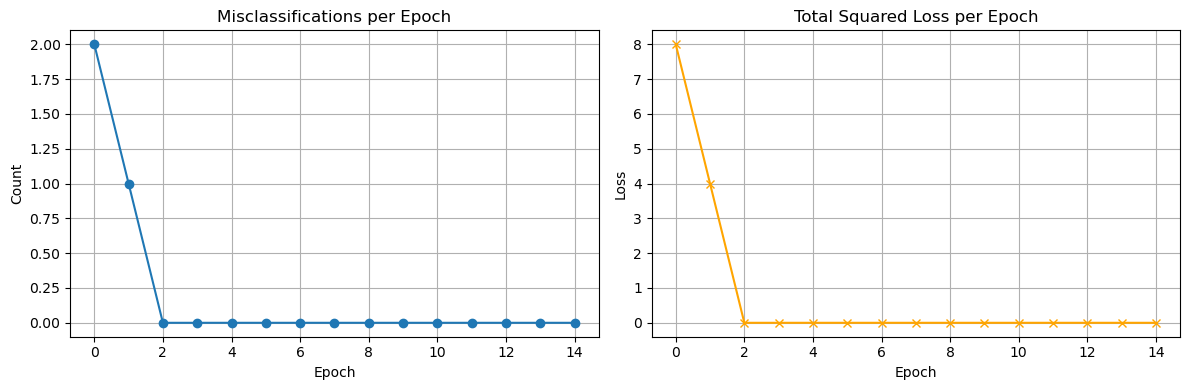

In [27]:
X_and = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y_and = np.array([-1, -1, -1, 1])

p_and = Perceptron(num_inputs=2, learning_rate=0.1)
miscls, losses, snapshots, weight_history_and = fit_with_tracking(p_and, X_and, y_and, num_epochs=15)

print("AND Predictions:")
for x in X_and:
    print(f"Input: {x}, Prediction: {p_and.predict(x)}")

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(miscls, marker='o')
ax[0].set_title("Misclassifications per Epoch")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Count")
ax[0].grid(True)

ax[1].plot(losses, marker='x', color='orange')
ax[1].set_title("Total Squared Loss per Epoch")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].grid(True)


plt.tight_layout()
plt.show()

#### Weight history

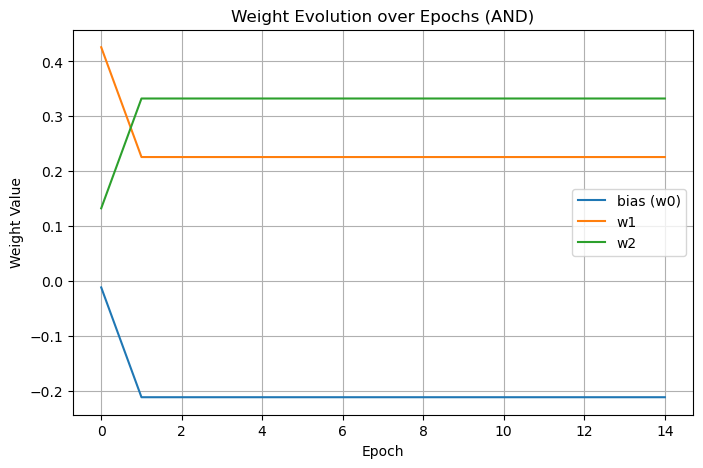

In [28]:
weights_array = np.array(weight_history_and)

# Plot evolution
plt.figure(figsize=(8, 5))
for i in range(weights_array.shape[1]):
    plt.plot(weights_array[:, i], label=f'w{i}' if i > 0 else 'bias (w0)')

plt.title("Weight Evolution over Epochs (AND)")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)
plt.show()

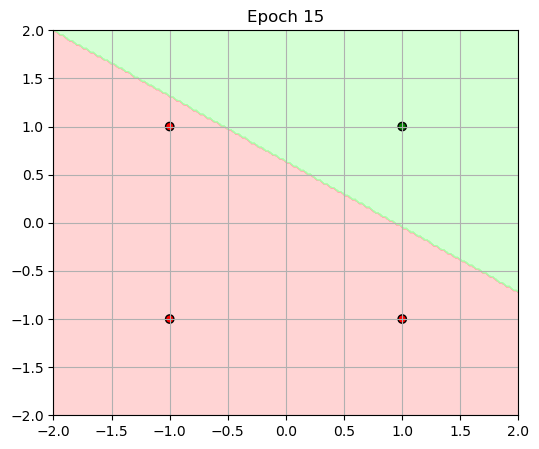

In [29]:
animate_decision_boundary(X_and, y_and, snapshots)

### Train on XOR

XOR Predictions:
Input: [-1  1], Prediction: -1
Input: [ 1 -1], Prediction: -1
Input: [-1 -1], Prediction: 1
Input: [1 1], Prediction: -1


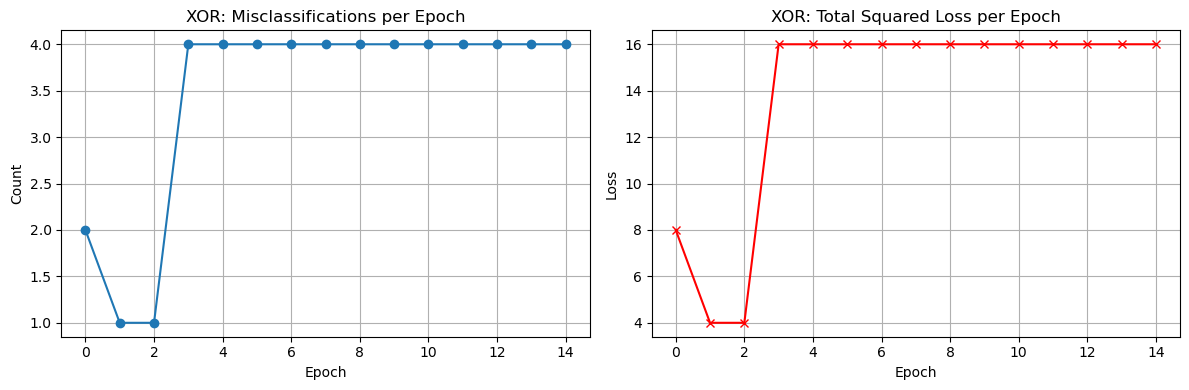

In [30]:
X_xor = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y_xor = np.array([1, 1, -1, -1])

p_xor = Perceptron(num_inputs=2, learning_rate=0.1)
miscls_xor, losses_xor, snapshots_xor, weight_history_xor = fit_with_tracking(p_xor, X_xor, y_xor, num_epochs=15)

# Final predictions
print("XOR Predictions:")
for x in X_xor:
    print(f"Input: {x}, Prediction: {p_xor.predict(x)}")

# Plot misclassifications and loss
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

ax[0].plot(miscls_xor, marker='o')
ax[0].set_title("XOR: Misclassifications per Epoch")
ax[0].set_xlabel("Epoch")
ax[0].set_ylabel("Count")
ax[0].grid(True)

ax[1].plot(losses_xor, marker='x', color='red')
ax[1].set_title("XOR: Total Squared Loss per Epoch")
ax[1].set_xlabel("Epoch")
ax[1].set_ylabel("Loss")
ax[1].grid(True)

plt.tight_layout()
plt.show()

#### Weight history XOR

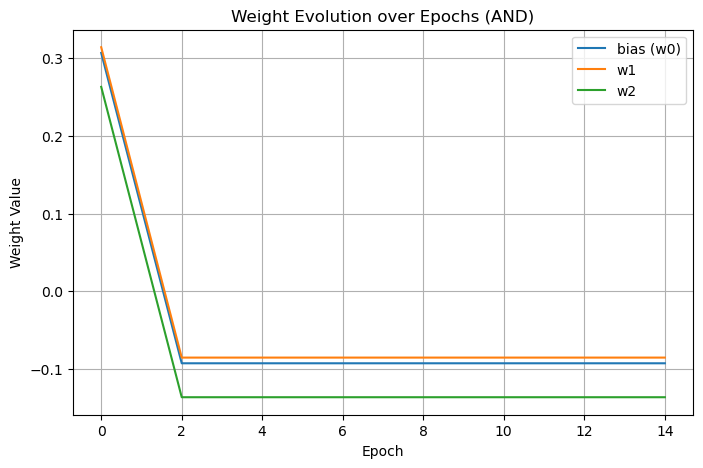

In [31]:
weights_array_xor = np.array(weight_history_xor)

# Plot evolution
plt.figure(figsize=(8, 5))
for i in range(weights_array_xor.shape[1]):
    plt.plot(weights_array_xor[:, i], label=f'w{i}' if i > 0 else 'bias (w0)')

plt.title("Weight Evolution over Epochs (AND)")
plt.xlabel("Epoch")
plt.ylabel("Weight Value")
plt.legend()
plt.grid(True)
plt.show()

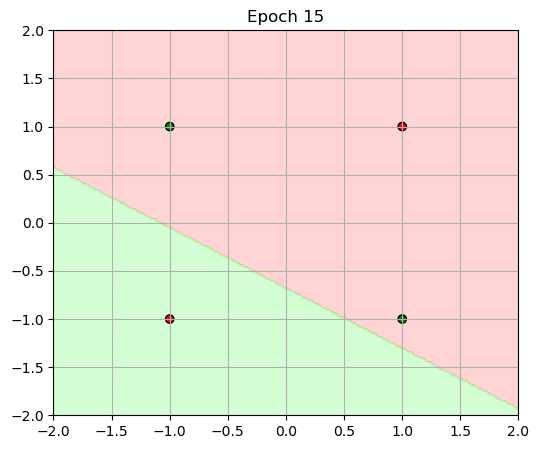

In [32]:
animate_decision_boundary(X_xor, y_xor, snapshots_xor)

#### XOR: Why the Perceptron Fails

- The XOR problem is not linearly separable.
- Even with learning, the decision boundary remains a straight line.
- The perceptron can't separate (1, -1) and (-1, 1) from the rest using a single line.
- This visualizes the **limitations** of the simple perceptron and the need for **multilayer neural networks (MLPs)** with non-linear activations.

## Learning Rate Analysis

In [33]:
def evaluate_learning_rate_convergence(X, y, learning_rates, max_epochs=50):
    results = []

    for lr in learning_rates:
        p = Perceptron(num_inputs=2, learning_rate=lr)
        converged_at = max_epochs

        for epoch in range(max_epochs):
            all_correct = True
            for input_, target in zip(X, y):
                prediction = p.predict(input_)
                if prediction != target:
                    all_correct = False
                    p.train(np.array(input_), target)
            if all_correct:
                converged_at = epoch + 1
                break

        results.append((lr, converged_at))

    return results

### Learning Rate - AND

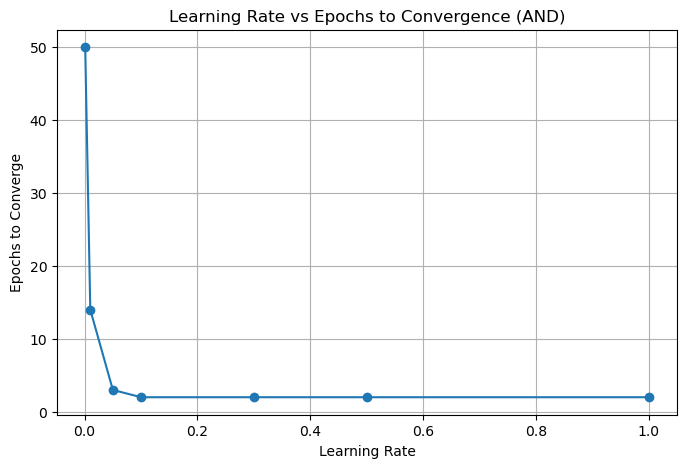

LR: 0.001 → Converged in 50 epochs
LR: 0.010 → Converged in 14 epochs
LR: 0.050 → Converged in 3 epochs
LR: 0.100 → Converged in 2 epochs
LR: 0.300 → Converged in 2 epochs
LR: 0.500 → Converged in 2 epochs
LR: 1.000 → Converged in 2 epochs


In [34]:
X_and = np.array([[-1, 1], [1, -1], [-1, -1], [1, 1]])
y_and = np.array([-1, -1, -1, 1])

learning_rates = [0.001, 0.01, 0.05, 0.1, 0.3, 0.5, 1.0]
results = evaluate_learning_rate_convergence(X_and, y_and, learning_rates)

# Plot convergence speed
lrs, epochs = zip(*results)

plt.figure(figsize=(8, 5))
plt.plot(lrs, epochs, marker='o')
plt.title("Learning Rate vs Epochs to Convergence (AND)")
plt.xlabel("Learning Rate")
plt.ylabel("Epochs to Converge")
plt.grid(True)
plt.show()

# Print raw results
for lr, ep in results:
    print(f"LR: {lr:.3f} → Converged in {ep} epochs")